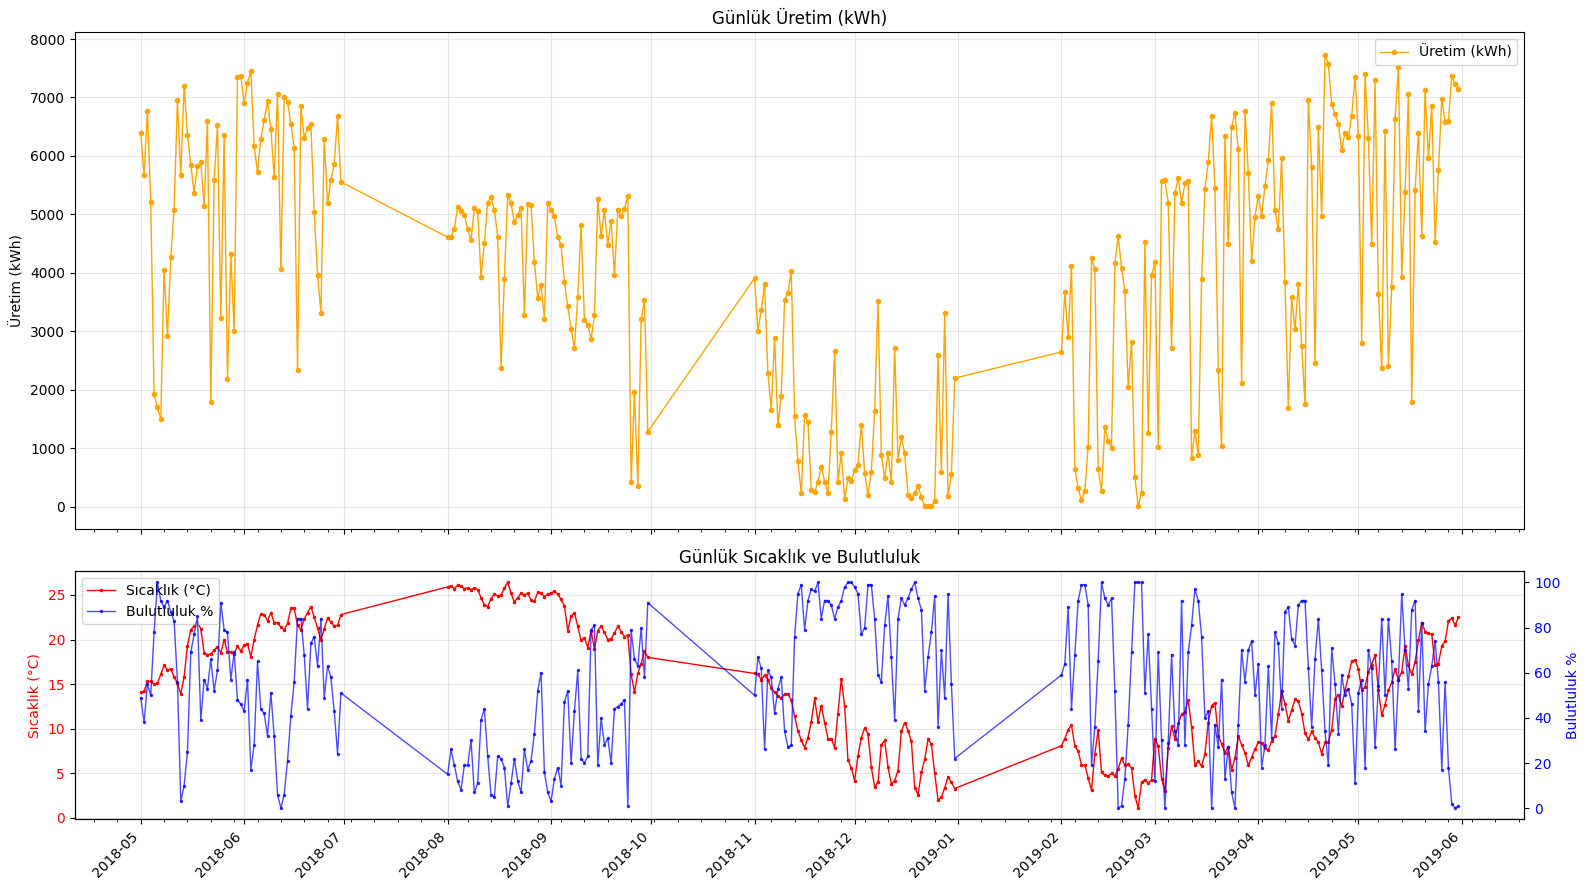

✓ Grafik kaydedildi → daily_timeseries_clean.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path

# ---------- Dosya yolu (gerekirse tam yol ver) ----------
df = pd.read_excel(r"C:\Users\alpgu\OneDrive\Desktop\DSA PROJECFT\train_data.xlsx")
df["Date"] = pd.to_datetime(df["Date"])   # KRİTİK! datetime yap
df = df.sort_values("Date").reset_index(drop=True)

# ------------- ŞEKİL / PANELLER ------------------------------
fig, (ax_prod, ax_met) = plt.subplots(
    2, 1, figsize=(16, 9), sharex=True,
    gridspec_kw={"height_ratios":[2,1]}
)

# === ÜST PANEL – Üretim ======================================
ax_prod.plot(df["Date"], df["Üretim (kWh)"],
             color="orange", lw=1, marker="o", ms=3,
             label="Üretim (kWh)")
ax_prod.set_ylabel("Üretim (kWh)")
ax_prod.set_title("Günlük Üretim (kWh)")
ax_prod.grid(alpha=0.3)
ax_prod.legend()

# === ALT PANEL – Sıcaklık & Bulutluluk =======================
# Sol eksen: sıcaklık
ax_met.plot(df["Date"], df["Temp_mean_C"],
            color="red", lw=1, marker=".", ms=3,
            label="Sıcaklık (°C)")
ax_met.set_ylabel("Sıcaklık (°C)", color="red")
ax_met.tick_params(axis="y", labelcolor="red")
ax_met.grid(alpha=0.3)

# Sağ eksen: bulutluluk
ax_r = ax_met.twinx()
ax_r.plot(df["Date"], df["CloudCover_%"],
          color="blue", lw=1, marker=".", ms=3,
          label="Bulutluluk %", alpha=0.7)
ax_r.set_ylabel("Bulutluluk %", color="blue")
ax_r.tick_params(axis="y", labelcolor="blue")

# === X-EKSENİNİ TARİH OLARAK FORMATLA ========================
month_locator = mdates.MonthLocator(interval=1)           # her ay
month_fmt     = mdates.DateFormatter("%Y-%m")
ax_met.xaxis.set_major_locator(month_locator)
ax_met.xaxis.set_major_formatter(month_fmt)

# Daha sık (haftalık) ince grid istersen:
ax_met.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1))

fig.autofmt_xdate(rotation=45)   # etiketleri eğ

# === Legendi birleştir ======================================
handles1, labels1 = ax_met.get_legend_handles_labels()
handles2, labels2 = ax_r.get_legend_handles_labels()
ax_met.legend(handles1 + handles2, labels1 + labels2, loc="upper left")

ax_met.set_title("Günlük Sıcaklık ve Bulutluluk")

plt.tight_layout()
plt.savefig("daily_timeseries_clean.png", dpi=300)
plt.show()

print("✓ Grafik kaydedildi → daily_timeseries_clean.png")